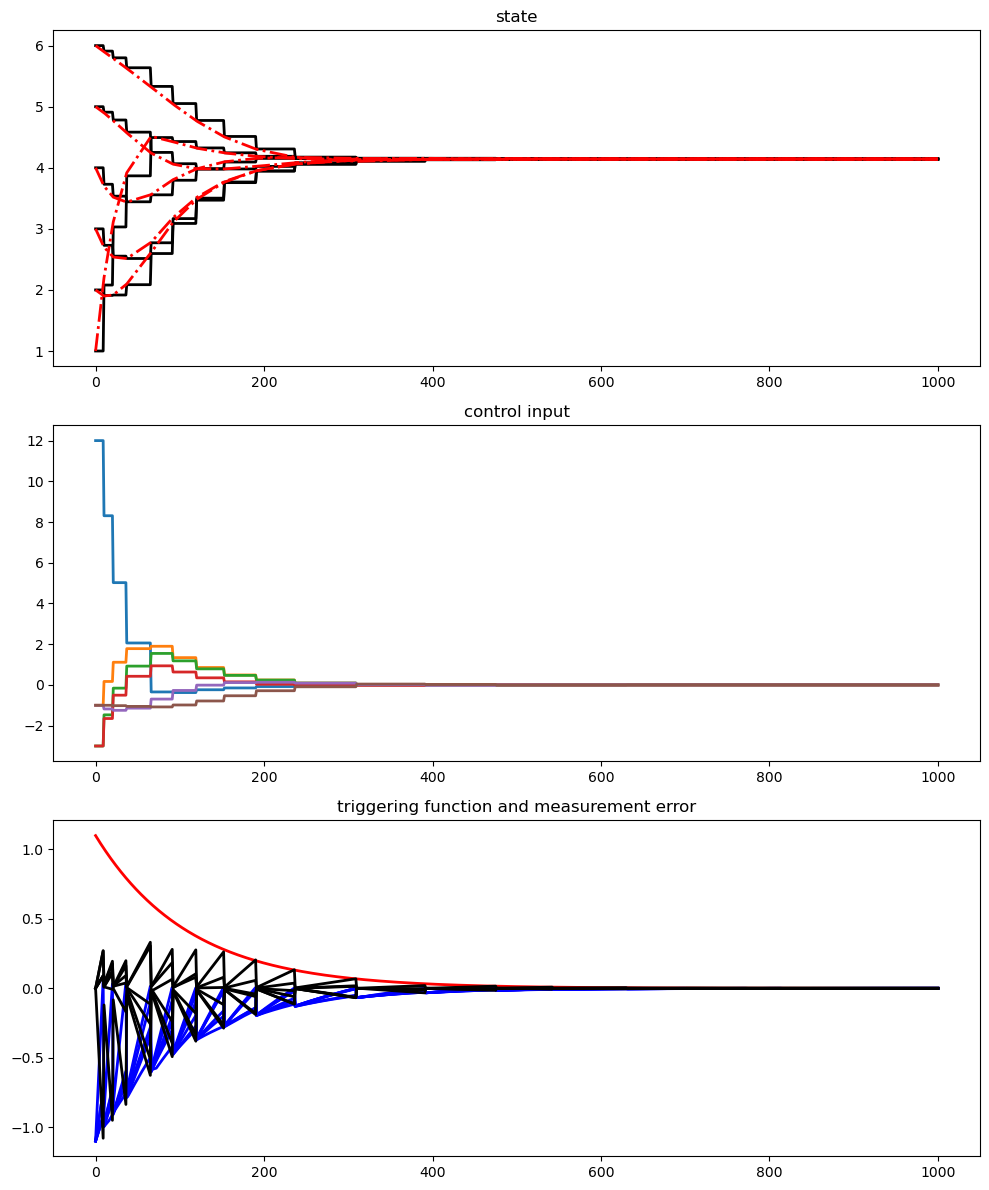

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6])  # 初始状态
L = np.array([[3, 0, 0, -1, -1, -1],
              [-1, 1, 0, 0, 0, 0],
              [-1, -1, 2, 0, 0, 0],
              [-1, 0, 0, 1, 0, 0],
              [0, 0, 0, -1, 1, 0],
              [0, 0, 0, 0, -1, 1]])  # laplace矩阵
dt = 0.01
Ts = np.arange(0, 10 + dt, dt)
xhat = x.copy()
x1 = []
x1hat = []
s = 0
E = []
alpha = 0.9
c1 = 1.1
ef = []
M = []
U = []
T1 = []

for t in Ts:
    ef1 = []
    # 储存数据
    x1.append(x)
    x1hat.append(xhat)
    e = []
    # 1. 计算测量误差 e = xhat - x
    for i in range(len(x)):
        e1 = x1hat[s][i] - x1[s][i]
        e.append(e1)
    # 储存误差
    E.append(e)
    # 2. 计算事件触发函数
    m = c1 * np.exp(-alpha * t)
    for i in range(len(x)):
        f1 = np.linalg.norm(e[i]) - m
        ef1.append(f1)
        # 4. 判断是否发生事件触发，如果是，更新状态
        if f1 >= 0:
            xhat = x.copy()
            num1 = s
            T1.append(num1)
    ef.append(ef1)
    M.append(m)
    # 3. 更新状态
    u = -np.dot(L, x1hat[s][:])
    x = x + dt * u
    U.append(u)
    s += 1

# 画图
plt.figure(figsize=(10, 12))

plt.subplot(311)
plt.plot(x1hat, 'k', linewidth=2)
plt.plot(x1, 'r-.', linewidth=2)
plt.title('state')

plt.subplot(312)
plt.plot(U, linewidth=2)
plt.title('control input')

plt.subplot(313)
plt.plot(M, 'r', linewidth=2)
plt.plot(ef, 'b', linewidth=2)
plt.plot(E, 'k', linewidth=2)
plt.title('triggering function and measurement error')

plt.tight_layout()
plt.show()


In [11]:
T1

[9,
 20,
 36,
 65,
 91,
 119,
 152,
 190,
 236,
 309,
 391,
 475,
 542,
 630,
 700,
 771,
 813,
 892,
 925]